# Mini Project 2

## Team Members : 
## Palak Patel
## Pallavi Yadkikar

# Getting ready with Dataframes

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/Colab Notebooks'

 215
 best_weights_NN.hdf5
 best_weights_NNSmooth.hdf5
 best_weights_regression1.hdf5
 best_weights_regression.hdf5
 business.json
 checkin.json
 Lab10_regularization.ipynb
 Lab5_tensor_flow.ipynb
 Lab6_evaluating_neural_networks.ipynb
 Lab7_model_visualization.ipynb
 Lab8_parameter_tuning.ipynb
 Lab9_cnn.ipynb
 Mini_project_1_Additional.ipynb
 Mini_Project_1_Palak_Pallavi.ipynb
 Mini_Project_2.ipynb
'Mini_Project_2_Palak&Pallavi.ipynb'
 photo.json
 Project_2.ipynb
 Project_2_mardav_ls.ipynb
 review.json
'StarRatingPrediction_TensorFlow (1).ipynb'
 tip.json


In [0]:
#Convert .json files into pandas dataframes

import json
import csv
import pandas as pd
outfile = open("reviews.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id','stars', 'text'])
with open('/content/drive/My Drive/Colab Notebooks/review.json', encoding="utf-8") as f:

    for line in f:

        row = json.loads(line)

        # some special char must be encoded in 'utf-8'

        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
        
outfile.close()
df_r= pd.read_csv('reviews.tsv', delimiter ="\t", encoding="utf-8", nrows=500000)


In [0]:
df_r.head()

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,b'Total bill for this horrible service? Over $...
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"b""I *adore* Travis at the Hard Rock's new Kell..."
2,WTqjgwHlXbSFevF32_DJVw,5.0,"b""I have to say that this office really has it..."
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"b""Went in for a lunch. Steak sandwich was deli..."
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,b'Today was my second out of three sessions I ...


In [0]:
import json
import csv
import pandas as pd
outfile_1 = open("business_1.tsv", 'w')
sfile_1 = csv.writer(outfile_1, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile_1.writerow(['business_id','stars', 'review_count'])
with open('/content/drive/My Drive/Colab Notebooks/business.json', encoding="utf-8") as f:

    for line in f:

        row = json.loads(line)

        # some special char must be encoded in 'utf-8'

        sfile_1.writerow([row['business_id'], row['stars'], row['review_count']])
        
outfile_1.close()
df_b = pd.read_csv('business_1.tsv', delimiter ="\t", encoding="utf-8", nrows=500000)

In [0]:
df_b.head()


,business_id,stars,review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4


In [0]:
df_c = df_b[~df_b.business_id.isin(['YSilq0Was9b4Q7oId_gUUw', 'Pah1N0Di1WA3wsI5TYkY7w', 'W6q7CANl3UbQa5hGCYU5OQ'])]

In [0]:
x1 = set(df_r.business_id) 
y1 = set(df_c.business_id)

z1 = y1 - x1
print(z1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
#Group all the reviews by each business and create a new dataframe, where each line is a business with all its reviews. 

df_review_agg = df_r.groupby('business_id')['text'].sum()

In [0]:
df_review_agg.head()
df_review_agg.shape



(18983,)

In [0]:
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews': df_review_agg.values})

In [0]:
df_ready_for_sklearn.head()

,all_reviews,business_id
0,"b""Delicious! \n\nCame from Chicago this evenin...",--Gc998IMjLn8yr-HTzGUg
1,"b""Had to get my wing fix, I like dry rubs on w...",--I7YYLada0tSLkORTHb5Q
2,"b""Let's start with the bad. REALLY slow. I din...",--U98MNlDym2cLn36BBPgQ
3,b'I love this place. Its always quiet and rela...,--j-kaNMCo1-DYzddCsA5Q
4,"b""Awesome, fantastic, friendly---I honestly ca...",--wIGbLEhlpl_UeAIyDmZQ


In [0]:
#Merge Dataframes

df_merge = pd.merge(df_c,df_ready_for_sklearn, on ="business_id")

In [0]:
df_merge.head()

,business_id,stars,review_count,all_reviews
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re..."
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t..."


# Z Score 

In [0]:
#Calculate Z-Score for ‘review_count’.

from scipy.stats import zscore

df_merge['normal_review_count'] = zscore(df_merge['review_count'])
df_merge[:10]

,business_id,stars,review_count,all_reviews,normal_review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re...",-0.265740
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...,0.910968
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...,1.312771
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...,-0.284874
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t...",-0.275307
5,68dUKd8_8liJ7in4aWOSEA,2.5,3,b'horrible. do not go. staff is dishonest and...,-0.284874
6,5JucpCfHZltJh5r1JabjDg,3.5,7,b'OK place- I\'ve gone for a couple of years a...,-0.246607
7,gbQN7vr_caG_A1ugSmGhWg,3.5,3,"b'My stylist, Maria, listened to me carefully ...",-0.284874
8,Y6iyemLX_oylRpnr38vgMA,5.0,8,b'My nail girl is renting station at this plac...,-0.237040
9,4GBVPIYRvzGh4K4TkRQ_rw,4.5,8,"b""I've always had an excellent experience at O...",-0.237040


#  MinMax for MNB

In [0]:
mini_count= df_merge['review_count'].min()
maxi_count= df_merge['review_count'].max()
df_merge['normal_min_max_review_count'] = ((df_merge['review_count']-mini_count)/(maxi_count-mini_count))

In [0]:
df_merge[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re...",-0.265740,0.000473
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...,0.910968,0.029593
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...,1.312771,0.039536
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...,-0.284874,0.000000
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t...",-0.275307,0.000237
5,68dUKd8_8liJ7in4aWOSEA,2.5,3,b'horrible. do not go. staff is dishonest and...,-0.284874,0.000000
6,5JucpCfHZltJh5r1JabjDg,3.5,7,b'OK place- I\'ve gone for a couple of years a...,-0.246607,0.000947
7,gbQN7vr_caG_A1ugSmGhWg,3.5,3,"b'My stylist, Maria, listened to me carefully ...",-0.284874,0.000000
8,Y6iyemLX_oylRpnr38vgMA,5.0,8,b'My nail girl is renting station at this plac...,-0.237040,0.001184
9,4GBVPIYRvzGh4K4TkRQ_rw,4.5,8,"b""I've always had an excellent experience at O...",-0.237040,0.001184


In [0]:
df_merge.all_reviews = df_merge.all_reviews.apply(lambda x: x.lower()) #convert text to lower case

In [0]:
df_merge.all_reviews = df_merge.all_reviews.replace(r'\\n','', regex=True) 

In [0]:
df_merge[:10]
df_merge.shape

(18983, 6)

In [0]:



df_combine = df_merge[(df_merge.review_count>50) & (df_merge.review_count<3000)]



In [0]:
df_combine.shape

(2583, 6)

In [0]:
df_combine['all_reviews'] = df_combine['all_reviews'].str.replace('[^\w\s]','') #removing punctuation 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_combine[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,bmy girlfriend and i went for dinner at emeral...,0.910968,0.029593
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,bhusband was craving chicken teriyaki gyoza s...,1.312771,0.039536
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,bits awesome herethe guys are soooo hot and ni...,0.710067,0.024621
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,bwe found out about this gem from the mans cow...,1.446705,0.042850
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,bi got into a parking lot accident with my 201...,0.183896,0.011600
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,bpretty solid vegan spot had a rice bowl there...,0.231730,0.012784
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,bim not sure how you can rate a classic ice cr...,0.231730,0.012784
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,bfirst time here 1152017 to see entombed ad pl...,0.298697,0.014441
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,bi loved my little cake but the owner is her o...,1.351038,0.040483
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,bit doesnt get more kooky than meatless easter...,2.001576,0.056581


In [0]:
df_combine['all_reviews'] = df_combine['all_reviews'].str[1:]  #removing first char "b"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_combine[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,my girlfriend and i went for dinner at emerald...,0.910968,0.029593
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,husband was craving chicken teriyaki gyoza so...,1.312771,0.039536
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,its awesome herethe guys are soooo hot and nic...,0.710067,0.024621
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,we found out about this gem from the mans cowo...,1.446705,0.042850
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,i got into a parking lot accident with my 2011...,0.183896,0.011600
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,pretty solid vegan spot had a rice bowl there ...,0.231730,0.012784
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,im not sure how you can rate a classic ice cre...,0.231730,0.012784
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,first time here 1152017 to see entombed ad ple...,0.298697,0.014441
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,i loved my little cake but the owner is her ow...,1.351038,0.040483
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,it doesnt get more kooky than meatless eastern...,2.001576,0.056581


In [0]:
df_combine['all_reviews'] = df_combine['all_reviews'].str.replace('\d+', '') #removing digits

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_combine[:20]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,my girlfriend and i went for dinner at emerald...,0.910968,0.029593
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,husband was craving chicken teriyaki gyoza so...,1.312771,0.039536
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,its awesome herethe guys are soooo hot and nic...,0.710067,0.024621
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,we found out about this gem from the mans cowo...,1.446705,0.042850
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,i got into a parking lot accident with my cad...,0.183896,0.011600
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,pretty solid vegan spot had a rice bowl there ...,0.231730,0.012784
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,im not sure how you can rate a classic ice cre...,0.231730,0.012784
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,first time here to see entombed ad plenty of ...,0.298697,0.014441
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,i loved my little cake but the owner is her ow...,1.351038,0.040483
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,it doesnt get more kooky than meatless eastern...,2.001576,0.056581


# TF-IDF Vectorizer

In [0]:
#TF-IDF to do feature extraction from review contents for models.

import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(stop_words = 'english', max_features = 1000, min_df=1)

matrix = vectorizer.fit_transform(df_combine.all_reviews)


In [0]:
print(vectorizer.get_feature_names())

['able', 'absolutely', 'accommodating', 'actual', 'actually', 'add', 'added', 'addition', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'airport', 'amazing', 'ambiance', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'area', 'arent', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad', 'bag', 'bagel', 'baked', 'bar', 'barely', 'bartender', 'based', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beans', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'bottle', 'bought', 'bowl', 'box', 'boyfriend', 'bread', 'breakfast', 'bring', 'brisket', 'broth', 'brought', 'brunch', 'bucks', 'buffet', 'building', 'bun', 'bunch', 'burger', 'burgers', 'burrito', 'business', 'busy', 'butter', 'buy', 'cafe', 'cake', 'cakes',

# Getting X ready for Modeling

In [0]:
#After feature normalization with Z-Score, X is ready for all other models

a_1 = matrix.toarray()

In [0]:
normal_review_count = df_combine['normal_review_count'].tolist()

In [0]:
import numpy as np
a_2 = np.asarray([ np.asarray(normal_review_count)])

In [0]:
a_1.shape

(2583, 1000)

In [0]:
print(a_2)

[[0.91096793 1.31277074 0.71006653 ... 0.41349778 0.68136632 0.23172984]]


In [0]:
a_3 = np.concatenate((a_1,a_2.T), axis=1)

In [0]:
print(a_3)

[[0.00171747 0.01021657 0.         ... 0.         0.00227365 0.91096793]
 [0.00263981 0.00523441 0.00188756 ... 0.         0.00524202 1.31277074]
 [0.0279295  0.         0.         ... 0.         0.         0.71006653]
 ...
 [0.04920593 0.00813077 0.01172802 ... 0.         0.         0.41349778]
 [0.0068188  0.01014063 0.0048757  ... 0.0060089  0.0135405  0.68136632]
 [0.03779123 0.         0.         ... 0.         0.         0.23172984]]


In [0]:
x = a_3
print(x)

[[0.00171747 0.01021657 0.         ... 0.         0.00227365 0.91096793]
 [0.00263981 0.00523441 0.00188756 ... 0.         0.00524202 1.31277074]
 [0.0279295  0.         0.         ... 0.         0.         0.71006653]
 ...
 [0.04920593 0.00813077 0.01172802 ... 0.         0.         0.41349778]
 [0.0068188  0.01014063 0.0048757  ... 0.0060089  0.0135405  0.68136632]
 [0.03779123 0.         0.         ... 0.         0.         0.23172984]]


## Getting x ready for mnb

In [0]:
#After feature normalization with Min-Max, X is ready for MNB model

normal_min_max_review_count = df_combine['normal_min_max_review_count'].tolist()

import numpy as np
a_4 = np.asarray([ np.asarray(normal_min_max_review_count)])
x_mnb = np.concatenate((a_1,a_4.T), axis=1)

In [0]:
print(x.shape)
print(x_mnb.shape)

(2583, 1001)
(2583, 1001)


# Making Y ready for Modeling

In [0]:

y_list = df_combine['stars'].tolist()

In [0]:
y = y_list

In [0]:
import numpy as np
y = np.asarray(y_list)

In [0]:
print(y.shape)

(2583,)


In [0]:
print(type(y))

<class 'numpy.ndarray'>


In [0]:
y[:10]

array([2.5, 4. , 4. , 4.5, 4.5, 3. , 4.5, 2.5, 4. , 4.5])

# Splitting Data for Training & Testing

## Making Y ready for Modeling

In [0]:
# Label Encoding for linear regression,For linear regression Y is label encoded

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#le.fit(y)

normal_y = le.fit_transform(y)
le.classes_

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

## Splitting data for linear regression

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x, y, test_size = 0.15, random_state = 42)

## Splitting Data for mnb

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train_mnb, x_test_mnb, y_train_mnb, y_test_mnb = train_test_split(x_mnb, normal_y, test_size = 0.15, random_state = 42)

## Splitting Data for other models

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, normal_y, test_size = 0.15, random_state = 42)

In [0]:
y_train.shape

(2195,)

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train_lin, y_train_lin)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
from sklearn import metrics

y_pred_lir = lin_reg.predict(x_test_lin)

print("test", y_test_lin[:20])
print("pred", y_pred_lir[:20])

print("R2 score:",metrics.r2_score(y_test_lin,y_pred_lir))
print("RMSE::   ",np.sqrt(metrics.mean_squared_error(y_test_lin, y_pred_lir)))
print("MSE:     ", metrics.mean_squared_error(y_test_lin, y_pred_lir))

test [3.5 4.  4.  4.  4.  4.  3.5 3.  2.5 4.  4.  3.5 3.5 3.5 4.  4.  3.  3.5
 4.  3.5]
pred [3.4899191  4.50240916 3.98507549 3.83589539 4.03957448 4.12322232
 4.37257958 3.02215727 2.00980139 3.86575136 4.03244476 3.16957318
 3.03863577 3.56206458 3.81909409 3.65518514 3.01913041 3.59092158
 3.97158446 4.39252653]
R2 score: 0.699275689973706
RMSE::    0.3693440434022799
MSE:      0.13641502239674522


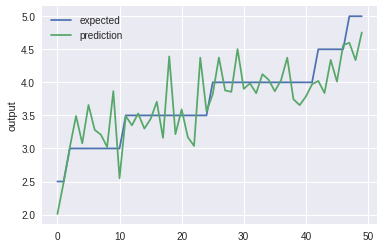

In [0]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    

chart_regression(y_pred_lir[:50], y_test_lin[:50])

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

y_pred_log = log_reg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn import metrics

y_pred_log = log_reg.predict(x_test)

print("test", y_test[:20])
print("pred", y_pred_log[:20])


print(metrics.confusion_matrix(y_test,y_pred_log))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_log,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_log,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_log,average='weighted'))

test [5 6 6 6 6 6 5 4 3 6 6 5 5 5 6 6 4 5 6 5]
pred [5 6 6 5 6 6 6 5 4 6 5 5 7 5 5 6 4 4 6 6]
[[ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  2  3  1  0  0]
 [ 0  0  0  2 16  4  1  0  0]
 [ 0  0  0  2 10 33 10  1  0]
 [ 0  0  0  0  9 38 46 10  0]
 [ 0  0  0  0  0 16 91 12  1]
 [ 0  0  0  0  0  2 31 25  1]
 [ 0  0  0  0  0  0  3 12  3]]
Precision Score::  0.41064271939745756
Recall Score::  0.43556701030927836
F1 Score::  0.4016463266271519


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## MNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_mnb, y_train_mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = mnb.predict(x_test_mnb)

print("test", y_test_mnb[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test_mnb,y_pred))
print("Precision Score:: ",metrics.precision_score(y_test_mnb,y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_mnb,y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_mnb,y_pred,average='weighted'))

test [5 6 6 6 6 6 5 4 3 6]
pred [5 6 6 5 6 6 6 5 5 6]
[[ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  3  1  1  0  1]
 [ 0  0  1  0  4 11  5  2  0]
 [ 0  0  0  0  5 21 23  7  0]
 [ 0  0  0  0  1 26 53 20  3]
 [ 0  0  0  0  1  8 92 18  1]
 [ 0  0  0  0  0  1 38 19  1]
 [ 0  0  0  0  0  0  1  9  8]]
Precision Score::  0.3477209273429134
Recall Score::  0.3865979381443299
F1 Score::  0.33794503887700067


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
y_pred_knn = knn.predict(x_test)

print("test", y_test[:10])
print("pred", y_pred_knn[:10])

print(metrics.confusion_matrix(y_test,y_pred_knn))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_knn,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_knn,average='weighted'))

test [5 6 6 6 6 6 5 4 3 6]
pred [5 4 6 5 5 6 5 6 4 6]
[[ 1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  1  1  4  0  1  0  0  0]
 [ 0  2  3  5  7  4  2  0  0]
 [ 0  1  2 12 16 14 10  1  0]
 [ 0  2  1 13 29 33 20  5  0]
 [ 0  2  0  3 24 30 49 12  0]
 [ 0  0  1  4  7 11 26  9  1]
 [ 0  0  0  1  2  0  7  5  3]]
Precision Score::  0.3435868029392645
Recall Score::  0.3015463917525773
F1 Score::  0.30836831438545476


## SVM 

In [0]:
from sklearn.svm import SVC

svm = SVC(C=10.0,kernel='linear')
svm.fit(x_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn import metrics

y_pred_svm = svm.predict(x_test)

print("test", y_test[:20])
print("pred", y_pred_svm[:20])


print(metrics.confusion_matrix(y_test,y_pred_svm))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_svm,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_svm,average='weighted'))

test [5 6 6 6 6 6 5 4 3 6 6 5 5 5 6 6 4 5 6 5]
pred [5 6 6 6 6 6 6 3 4 6 6 4 5 5 6 5 4 5 6 6]
[[ 0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  1  1  4  1  0  0  0  0]
 [ 0  1  2 13  7  0  0  0  0]
 [ 0  0  3  7 27 18  1  0  0]
 [ 0  0  0  1 16 62 22  2  0]
 [ 0  0  0  0  2 19 87 12  0]
 [ 0  0  0  0  0  3 14 37  5]
 [ 0  0  0  0  0  0  1  7 10]]
Precision Score::  0.6102940104601291
Recall Score::  0.6108247422680413
F1 Score::  0.6100501544957396


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
a_3.shape

(2583, 1001)

# **Using Tensorflow**

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# **Rgression**

## **Model Fitting**

In [0]:
model = Sequential()

model.add(Dense(25, input_dim=x_train_lin.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train_lin,y_train_lin,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.


Epoch 1/100
 - 5s - loss: 7.9652
Epoch 2/100
 - 0s - loss: 1.1614
Epoch 3/100
 - 0s - loss: 0.8372
Epoch 4/100
 - 0s - loss: 0.6140
Epoch 5/100
 - 0s - loss: 0.4341
Epoch 6/100
 - 0s - loss: 0.3061
Epoch 7/100
 - 0s - loss: 0.2304
Epoch 8/100
 - 0s - loss: 0.1826
Epoch 9/100
 - 0s - loss: 0.1527
Epoch 10/100
 - 0s - loss: 0.1320
Epoch 11/100
 - 0s - loss: 0.1169
Epoch 12/100
 - 0s - loss: 0.1074
Epoch 13/100
 - 0s - loss: 0.0998
Epoch 14/100
 - 0s - loss: 0.0935
Epoch 15/100
 - 0s - loss: 0.0867
Epoch 16/100
 - 0s - loss: 0.0825
Epoch 17/100
 - 0s - loss: 0.0780
Epoch 18/100
 - 0s - loss: 0.0741
Epoch 19/100
 - 0s - loss: 0.0704
Epoch 20/100
 - 0s - loss: 0.0689
Epoch 21/100
 - 0s - loss: 0.0651
Epoch 22/100
 - 0s - loss: 0.0633
Epoch 23/100
 - 0s - loss: 0.0608
Epoch 24/100
 - 0s - loss: 0.0589
Epoch 25/100
 - 0s - loss: 0.0567
Epoch 26/100
 - 0s - loss: 0.0557
Epoch 27/100
 - 0s - loss: 0.0560
Epoch 28/100
 - 0s - loss: 0.0533
Epoch 29/100
 - 0s - loss: 0.0506
Epoch 30/100
 - 0s - lo

## **Prediction & Accuracy**

In [0]:
pred = model.predict(x_test_lin)
print("Shape: {}".format(pred.shape))
print(pred)

score = np.sqrt(metrics.mean_squared_error(pred,y_test_lin))
print("Final score (RMSE): {}".format(score))

Shape: (388, 1)
[[3.376116 ]
 [4.2072926]
 [3.4434793]
 [3.788902 ]
 [4.003944 ]
 [4.2725196]
 [3.803955 ]
 [3.1586812]
 [2.138804 ]
 [3.9341507]
 [4.0515165]
 [3.2709012]
 [3.5347283]
 [3.4276526]
 [4.0438848]
 [3.5274017]
 [2.9404857]
 [3.4626534]
 [3.8306613]
 [4.2123737]
 [3.7127788]
 [3.053587 ]
 [3.321624 ]
 [3.5385852]
 [3.1069276]
 [3.4388087]
 [2.8171935]
 [3.9255412]
 [4.399789 ]
 [3.9394374]
 [4.337239 ]
 [2.4378157]
 [3.5468585]
 [4.06271  ]
 [2.9551537]
 [3.0606585]
 [3.5476565]
 [3.2327397]
 [4.1967316]
 [3.1047468]
 [4.4926534]
 [3.768099 ]
 [4.0322366]
 [3.6997354]
 [4.9182115]
 [3.8268623]
 [4.164805 ]
 [4.380322 ]
 [2.6441581]
 [4.497718 ]
 [3.35448  ]
 [4.332864 ]
 [2.8782337]
 [4.4941006]
 [3.7666843]
 [4.425686 ]
 [3.3087125]
 [3.308258 ]
 [4.048169 ]
 [4.3782406]
 [3.1293387]
 [3.1070266]
 [2.943472 ]
 [4.94181  ]
 [2.3463676]
 [3.9398336]
 [3.8594303]
 [3.7163706]
 [4.576646 ]
 [3.1519063]
 [3.5483346]
 [3.489687 ]
 [4.2832694]
 [3.5093617]
 [3.482973 ]
 [3.20929

## **With Early Stopping**

## **Improved Score with early stopping**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_regression.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(8):
    print(i)
    #build network
    model_regression = Sequential()

    model_regression.add(Dense(25, input_dim=x_train_lin.shape[1], activation='relu')) # Hidden 1   
    model_regression.add(Dense(10, activation='relu')) # Hidden 2
    model_regression.add(Dense(1)) # Output

    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

    model_regression.fit(x_train_lin,y_train_lin,validation_data=(x_test_lin,y_test_lin),callbacks=[monitor,checkpointer],verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.


0
Train on 2195 samples, validate on 388 samples
Epoch 1/100
 - 5s - loss: 8.0885 - val_loss: 1.6278
Epoch 2/100
 - 0s - loss: 1.2169 - val_loss: 0.9430
Epoch 3/100
 - 0s - loss: 0.8808 - val_loss: 0.7039
Epoch 4/100
 - 0s - loss: 0.6230 - val_loss: 0.4990
Epoch 5/100
 - 0s - loss: 0.4149 - val_loss: 0.3581
Epoch 6/100
 - 0s - loss: 0.2891 - val_loss: 0.2804
Epoch 7/100
 - 0s - loss: 0.2242 - val_loss: 0.2379
Epoch 8/100
 - 0s - loss: 0.1868 - val_loss: 0.2080
Epoch 9/100
 - 0s - loss: 0.1610 - val_loss: 0.1883
Epoch 10/100
 - 0s - loss: 0.1436 - val_loss: 0.1746
Epoch 11/100
 - 0s - loss: 0.1283 - val_loss: 0.1632
Epoch 12/100
 - 0s - loss: 0.1178 - val_loss: 0.1538
Epoch 13/100
 - 0s - loss: 0.1106 - val_loss: 0.1468
Epoch 14/100
 - 0s - loss: 0.1038 - val_loss: 0.1464
Epoch 15/100
 - 0s - loss: 0.0979 - val_loss: 0.1389
Epoch 16/100
 - 0s - loss: 0.0927 - val_loss: 0.1342
Epoch 17/100
 - 0s - loss: 0.0888 - val_loss: 0.1320
Epoch 18/100
 - 0s - loss: 0.0847 - val_loss: 0.1285
Epoch 

In [0]:
model_regression.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_regression.hdf5')
pred = model_regression.predict(x_test_lin)
score = np.sqrt(metrics.mean_squared_error(y_test_lin,pred)) 

print("Score (RMSE):   {}".format(score))
print("R2 score       ",metrics.r2_score(y_test_lin,pred))
print("MSE:           ", metrics.mean_squared_error(y_test_lin, pred))

Score (RMSE):   0.3055426061211678
R2 score        0.7941978555882595
MSE:            0.09335628415531509


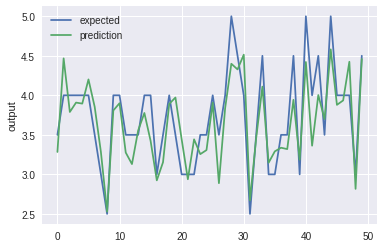

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt

chart_regression(pred[:50].flatten(),y_test_lin[:50],sort=False)

# Using  SGD and sigmoid

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_regression1.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(8):
    print(i)
    #build network
    model_regression = Sequential()

    model_regression.add(Dense(25, input_dim=x_train_lin.shape[1], activation='sigmoid')) # Hidden 1   
    model_regression.add(Dense(10, activation='sigmoid')) # Hidden 2
    model_regression.add(Dense(1)) # Output

    model_regression.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

    model_regression.fit(x_train_lin,y_train_lin,validation_data=(x_test_lin,y_test_lin),callbacks=[monitor,checkpointer],verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.


0
Train on 2195 samples, validate on 388 samples
Epoch 1/100
 - 6s - loss: 1.2716 - val_loss: 0.4526
Epoch 2/100
 - 0s - loss: 0.4892 - val_loss: 0.4512
Epoch 3/100
 - 0s - loss: 0.4870 - val_loss: 0.4513
Epoch 4/100
 - 0s - loss: 0.4881 - val_loss: 0.4509
Epoch 5/100
 - 0s - loss: 0.4873 - val_loss: 0.4521
Epoch 6/100
 - 0s - loss: 0.4874 - val_loss: 0.4522
Epoch 7/100
 - 0s - loss: 0.4870 - val_loss: 0.4498
Epoch 8/100
 - 0s - loss: 0.4871 - val_loss: 0.4496
Epoch 9/100
 - 0s - loss: 0.4869 - val_loss: 0.4504
Epoch 10/100
 - 0s - loss: 0.4865 - val_loss: 0.4492
Epoch 11/100
 - 0s - loss: 0.4866 - val_loss: 0.4488
Epoch 12/100
 - 0s - loss: 0.4858 - val_loss: 0.4506
Epoch 13/100
 - 0s - loss: 0.4857 - val_loss: 0.4494
Epoch 14/100
 - 0s - loss: 0.4858 - val_loss: 0.4486
Epoch 15/100
 - 0s - loss: 0.4850 - val_loss: 0.4479
Epoch 16/100
 - 0s - loss: 0.4847 - val_loss: 0.4486
Epoch 17/100
 - 0s - loss: 0.4850 - val_loss: 0.4475
Epoch 18/100
 - 0s - loss: 0.4843 - val_loss: 0.4496
Epoch 

In [0]:
model_regression.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_regression1.hdf5')
pred1 = model_regression.predict(x_test_lin)
score = np.sqrt(metrics.mean_squared_error(y_test_lin,pred1)) 

print("Score (RMSE):   {}".format(score))
print("R2 score       ",metrics.r2_score(y_test_lin,pred1))
print("MSE:           ", metrics.mean_squared_error(y_test_lin, pred1))

Score (RMSE):   0.6264275314082124
R2 score        0.13493645268891774
MSE:            0.39241145210618694


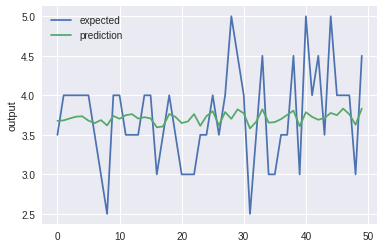

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt

chart_regression(pred1[:50].flatten(),y_test_lin[:50],sort=False)

## **Using SGD & tanh**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_regression1.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(8):
    print(i)
    #build network
    model_regression = Sequential()

    model_regression.add(Dense(25, input_dim=x_train_lin.shape[1], activation='sigmoid')) # Hidden 1   
    model_regression.add(Dense(10, activation='sigmoid')) # Hidden 2
    model_regression.add(Dense(1)) # Output

    model_regression.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

    model_regression.fit(x_train_lin,y_train_lin,validation_data=(x_test_lin,y_test_lin),callbacks=[monitor,checkpointer],verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.


0
Train on 2195 samples, validate on 388 samples
Epoch 1/100
 - 6s - loss: 1.6842 - val_loss: 0.4533
Epoch 2/100
 - 0s - loss: 0.4897 - val_loss: 0.4521
Epoch 3/100
 - 0s - loss: 0.4894 - val_loss: 0.4527
Epoch 4/100
 - 0s - loss: 0.4894 - val_loss: 0.4515
Epoch 5/100
 - 0s - loss: 0.4886 - val_loss: 0.4514
Epoch 6/100
 - 0s - loss: 0.4886 - val_loss: 0.4516
Epoch 7/100
 - 0s - loss: 0.4876 - val_loss: 0.4515
Epoch 8/100
 - 0s - loss: 0.4868 - val_loss: 0.4542
Epoch 9/100
 - 0s - loss: 0.4877 - val_loss: 0.4505
Epoch 10/100
 - 0s - loss: 0.4870 - val_loss: 0.4512
Epoch 11/100
 - 0s - loss: 0.4877 - val_loss: 0.4501
Epoch 12/100
 - 0s - loss: 0.4875 - val_loss: 0.4498
Epoch 13/100
 - 0s - loss: 0.4865 - val_loss: 0.4505
Epoch 14/100
 - 0s - loss: 0.4870 - val_loss: 0.4498
Epoch 15/100
 - 0s - loss: 0.4870 - val_loss: 0.4498
Epoch 16/100
 - 0s - loss: 0.4866 - val_loss: 0.4491
Epoch 17/100
 - 0s - loss: 0.4859 - val_loss: 0.4489
Epoch 18/100
 - 0s - loss: 0.4863 - val_loss: 0.4489
Epoch 

In [0]:
model_regression.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_regression1.hdf5')
pred2 = model_regression.predict(x_test_lin)
score = np.sqrt(metrics.mean_squared_error(y_test_lin,pred2)) 

print("Score (RMSE):   {}".format(score))
print("R2 score       ",metrics.r2_score(y_test_lin,pred1))
print("MSE:           ", metrics.mean_squared_error(y_test_lin, pred2))

Score (RMSE):   0.6340179578108384
R2 score        0.13493645268891774
MSE:            0.40197877082662603


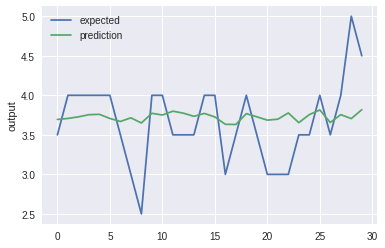

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt

chart_regression(pred2[:30].flatten(),y_test_lin[:30],sort=False)

# **Classification**

## One Hot Encoding 

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
columns_new = ['normal_y']

In [0]:
df_y_class = pd.DataFrame(normal_y , columns=columns_new)

In [0]:
encode_text_dummy(df_y_class,'normal_y')

In [0]:
df_y_class[:10]

,normal_y-0,normal_y-1,normal_y-2,normal_y-3,normal_y-4,normal_y-5,normal_y-6,normal_y-7,normal_y-8
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0


In [0]:
df_encoded_y = df_y_class.values

In [0]:
df_encoded_y[:10]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

## **Label Smoothing (Additional)**

In [0]:
df_smooth =  df_encoded_y *0.9  # label smoothing 

In [0]:
df_smooth[:10]

array([[0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
       [0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
       [0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ]])

# **Splitting Dataset**

In [0]:
x_trainNN,x_testNN,y_trainNN,y_testNN = train_test_split(x,df_encoded_y,test_size=0.25,random_state=1)

In [0]:
x_trainNNS,x_testNNS,y_trainNNS,y_testNNS = train_test_split(x,df_smooth,test_size=0.25,random_state=1)

In [0]:
x_trainNN.shape
y_trainNN.shape

(1937, 9)

In [0]:
df_encoded_y.shape

(2583, 9)

In [0]:
df_smooth.shape

(2583, 9)

# Tensorflow classification neural network model 

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NN.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNN.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='relu')) # Hidden 2
    
    model_classification.add(Dense(y_trainNN.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNN, y_trainNN,validation_data=(x_testNN,y_testNN),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/500
 - 7s - loss: 1.8741 - val_loss: 1.7080
Epoch 2/500
 - 0s - loss: 1.5625 - val_loss: 1.5221
Epoch 3/500
 - 0s - loss: 1.3813 - val_loss: 1.3333
Epoch 4/500
 - 0s - loss: 1.2160 - val_loss: 1.2063
Epoch 5/500
 - 0s - loss: 1.0840 - val_loss: 1.0783
Epoch 6/500
 - 0s - loss: 0.9806 - val_loss: 0.9989
Epoch 7/500
 - 0s - loss: 0.8976 - val_loss: 0.9477
Epoch 8/500
 - 0s - loss: 0.8214 - val_loss: 0.8999
Epoch 9/500
 - 0s - loss: 0.7700 - val_loss: 0.8648
Epoch 10/500
 - 0s - loss: 0.7168 - val_loss: 0.8397
Epoch 11/500
 - 0s - loss: 0.6751 - val_loss: 0.8148
Epoch 12/500
 - 0s - loss: 0.6419 - val_loss: 0.8042
Epoch 13/500
 - 0s - loss: 0.6062 - val_loss: 0.7861
Epoch 14/500
 - 0s - loss: 0.5699 - val_loss: 0.7850
Epoch 15/500
 - 0s - loss: 0.5438 - val_loss: 0.7724
Epoch 16/500
 - 0s - loss: 0.5272 - val_loss: 0.7749
Epoch 17/500
 - 0s - loss: 0.4964 - val_loss: 0.7760
Epoch 18/500
 - 0s - loss: 0.4709 - val_loss: 0.7751
Epoch 

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NN.hdf5')
pred_NN = model_classification.predict(x_testNN)

pred_NN = np.argmax(pred_NN,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNN,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.6885408551575445
Recall score:    0.695046439628483
F1 score:        0.6870719550000636


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **Parameter Tuning for Classification**

## **With Label smoothed y**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNNS.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='relu')) # Hidden 2
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 7s - loss: 1.7484 - val_loss: 1.5896
Epoch 2/1000
 - 0s - loss: 1.5086 - val_loss: 1.5219
Epoch 3/1000
 - 0s - loss: 1.4358 - val_loss: 1.4322
Epoch 4/1000
 - 0s - loss: 1.3205 - val_loss: 1.2926
Epoch 5/1000
 - 0s - loss: 1.1575 - val_loss: 1.1127
Epoch 6/1000
 - 0s - loss: 1.0110 - val_loss: 1.0036
Epoch 7/1000
 - 0s - loss: 0.9028 - val_loss: 0.9161
Epoch 8/1000
 - 0s - loss: 0.8201 - val_loss: 0.8674
Epoch 9/1000
 - 0s - loss: 0.7538 - val_loss: 0.8273
Epoch 10/1000
 - 0s - loss: 0.7028 - val_loss: 0.7819
Epoch 11/1000
 - 0s - loss: 0.6528 - val_loss: 0.7458
Epoch 12/1000
 - 0s - loss: 0.6130 - val_loss: 0.7323
Epoch 13/1000
 - 0s - loss: 0.5730 - val_loss: 0.7409
Epoch 14/1000
 - 0s - loss: 0.5430 - val_loss: 0.7146
Epoch 15/1000
 - 0s - loss: 0.5173 - val_loss: 0.7126
Epoch 16/1000
 - 0s - loss: 0.4869 - val_loss: 0.7036
Epoch 17/1000
 - 0s - loss: 0.4600 - val_loss: 0.6910
Epoch 18/1000
 - 0s - loss: 0.4379 - val_l

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NNS = model_classification.predict(x_testNNS)

pred_NNS = np.argmax(pred_NNS,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NNS, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NNS, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NNS, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.6654608316252482
Recall score:    0.6749226006191951
F1 score:        0.6686543907438568


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **With 4 hidden layers and different # of neurons**

Source: http://snap.stanford.edu/class/cs224w-2017/projects/cs224w-33-final.pdf

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NN.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(200, input_dim=x_trainNN.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(40, activation='relu')) # Hidden 2
    model_classification.add(Dense(8, activation='relu')) # Hidden 3
    model_classification.add(Dense(2, activation='relu')) # Hidden 4
    model_classification.add(Dense(y_trainNN.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNN, y_trainNN,validation_data=(x_testNN,y_testNN),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 8s - loss: 2.1751 - val_loss: 2.1545
Epoch 2/1000
 - 0s - loss: 2.1310 - val_loss: 2.1158
Epoch 3/1000
 - 0s - loss: 2.0911 - val_loss: 2.0806
Epoch 4/1000
 - 0s - loss: 2.0550 - val_loss: 2.0488
Epoch 5/1000
 - 0s - loss: 2.0222 - val_loss: 2.0201
Epoch 6/1000
 - 0s - loss: 1.9928 - val_loss: 1.9947
Epoch 7/1000
 - 0s - loss: 1.9660 - val_loss: 1.9716
Epoch 8/1000
 - 0s - loss: 1.9420 - val_loss: 1.9508
Epoch 9/1000
 - 0s - loss: 1.9202 - val_loss: 1.9325
Epoch 10/1000
 - 0s - loss: 1.9005 - val_loss: 1.9159
Epoch 11/1000
 - 0s - loss: 1.8830 - val_loss: 1.9010
Epoch 12/1000
 - 0s - loss: 1.8671 - val_loss: 1.8878
Epoch 13/1000
 - 0s - loss: 1.8529 - val_loss: 1.8761
Epoch 14/1000
 - 0s - loss: 1.8400 - val_loss: 1.8655
Epoch 15/1000
 - 1s - loss: 1.8283 - val_loss: 1.8561
Epoch 16/1000
 - 0s - loss: 1.8179 - val_loss: 1.8476
Epoch 17/1000
 - 0s - loss: 1.8086 - val_loss: 1.8401
Epoch 18/1000
 - 0s - loss: 1.8001 - val_l

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NN.hdf5')
pred_NN1 = model_classification.predict(x_testNNS)

pred_NN1 = np.argmax(pred_NN1,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN1, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN1, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN1, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.5387058952622946
Recall score:    0.6006191950464397
F1 score:        0.5559963686767957


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **RMSPROP** with RELU

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNNS.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='relu')) # Hidden 2
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 9s - loss: 1.6541 - val_loss: 1.5551
Epoch 2/1000
 - 0s - loss: 1.4584 - val_loss: 1.4553
Epoch 3/1000
 - 0s - loss: 1.3488 - val_loss: 1.3317
Epoch 4/1000
 - 0s - loss: 1.2252 - val_loss: 1.2099
Epoch 5/1000
 - 0s - loss: 1.1118 - val_loss: 1.1193
Epoch 6/1000
 - 0s - loss: 1.0106 - val_loss: 1.0259
Epoch 7/1000
 - 0s - loss: 0.9297 - val_loss: 0.9608
Epoch 8/1000
 - 0s - loss: 0.8556 - val_loss: 0.9278
Epoch 9/1000
 - 0s - loss: 0.8009 - val_loss: 0.8589
Epoch 10/1000
 - 0s - loss: 0.7514 - val_loss: 0.8311
Epoch 11/1000
 - 0s - loss: 0.7067 - val_loss: 0.7900
Epoch 12/1000
 - 0s - loss: 0.6699 - val_loss: 0.7837
Epoch 13/1000
 - 0s - loss: 0.6403 - val_loss: 0.7483
Epoch 14/1000
 - 0s - loss: 0.6093 - val_loss: 0.7426
Epoch 15/1000
 - 0s - loss: 0.5839 - val_loss: 0.7314
Epoch 16/1000
 - 0s - loss: 0.5576 - val_loss: 0.7123
Epoch 17/1000
 - 0s - loss: 0.5371 - val_loss: 0.7064
Epoch 18/1000
 - 0s - loss: 0.5160 - val_l

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NN2 = model_classification.predict(x_testNNS)

pred_NN2 = np.argmax(pred_NN2,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN2, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN2, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN2, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.6704390928596999
Recall score:    0.6857585139318886
F1 score:        0.674374103456599


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **RMSPROP with Sigmoid**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNNS.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='sigmoid')) # Hidden 2
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 9s - loss: 1.7238 - val_loss: 1.6128
Epoch 2/1000
 - 0s - loss: 1.5449 - val_loss: 1.5830
Epoch 3/1000
 - 0s - loss: 1.5263 - val_loss: 1.5739
Epoch 4/1000
 - 0s - loss: 1.5178 - val_loss: 1.5636
Epoch 5/1000
 - 0s - loss: 1.5075 - val_loss: 1.5574
Epoch 6/1000
 - 0s - loss: 1.4940 - val_loss: 1.5352
Epoch 7/1000
 - 0s - loss: 1.4775 - val_loss: 1.5284
Epoch 8/1000
 - 0s - loss: 1.4576 - val_loss: 1.5018
Epoch 9/1000
 - 0s - loss: 1.4326 - val_loss: 1.4746
Epoch 10/1000
 - 0s - loss: 1.4057 - val_loss: 1.4476
Epoch 11/1000
 - 0s - loss: 1.3729 - val_loss: 1.4128
Epoch 12/1000
 - 0s - loss: 1.3366 - val_loss: 1.3745
Epoch 13/1000
 - 0s - loss: 1.2991 - val_loss: 1.3438
Epoch 14/1000
 - 0s - loss: 1.2639 - val_loss: 1.2972
Epoch 15/1000
 - 0s - loss: 1.2272 - val_loss: 1.2659
Epoch 16/1000
 - 0s - loss: 1.1928 - val_loss: 1.2275
Epoch 17/1000
 - 0s - loss: 1.1562 - val_loss: 1.1986
Epoch 18/1000
 - 0s - loss: 1.1259 - val_l

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NN3 = model_classification.predict(x_testNNS)

pred_NN3 = np.argmax(pred_NN3,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN3, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN3, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN3, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.6744224679646678
Recall score:    0.6888544891640866
F1 score:        0.679048856611632


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **SGD with Sigmoid**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNNS.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='sigmoid')) # Hidden 2
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 10s - loss: 1.8172 - val_loss: 1.6889
Epoch 2/1000
 - 0s - loss: 1.6308 - val_loss: 1.6251
Epoch 3/1000
 - 0s - loss: 1.5806 - val_loss: 1.6065
Epoch 4/1000
 - 0s - loss: 1.5623 - val_loss: 1.5988
Epoch 5/1000
 - 0s - loss: 1.5534 - val_loss: 1.5935
Epoch 6/1000
 - 0s - loss: 1.5492 - val_loss: 1.5935
Epoch 7/1000
 - 0s - loss: 1.5465 - val_loss: 1.5922
Epoch 8/1000
 - 0s - loss: 1.5443 - val_loss: 1.5904
Epoch 9/1000
 - 0s - loss: 1.5431 - val_loss: 1.5898
Epoch 10/1000
 - 0s - loss: 1.5417 - val_loss: 1.5889
Epoch 11/1000
 - 0s - loss: 1.5412 - val_loss: 1.5887
Epoch 12/1000
 - 0s - loss: 1.5404 - val_loss: 1.5875
Epoch 13/1000
 - 0s - loss: 1.5396 - val_loss: 1.5866
Epoch 14/1000
 - 0s - loss: 1.5393 - val_loss: 1.5867
Epoch 15/1000
 - 0s - loss: 1.5385 - val_loss: 1.5862
Epoch 16/1000
 - 0s - loss: 1.5381 - val_loss: 1.5866
Epoch 17/1000
 - 0s - loss: 1.5381 - val_loss: 1.5873
Epoch 18/1000
 - 0s - loss: 1.5377 - val_

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NN4 = model_classification.predict(x_testNNS)

pred_NN4 = np.argmax(pred_NN4,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN4, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN4, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN4, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.09299667398326449
Recall score:    0.30495356037151705
F1 score:        0.14252871030412542


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **ADAGRAD with RELU**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(30, input_dim=x_trainNNS.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(45, activation='relu')) # Hidden 2
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adagrad')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/1000
 - 10s - loss: 1.5442 - val_loss: 1.4515
Epoch 2/1000
 - 0s - loss: 1.3376 - val_loss: 1.2912
Epoch 3/1000
 - 0s - loss: 1.1881 - val_loss: 1.1804
Epoch 4/1000
 - 0s - loss: 1.0816 - val_loss: 1.0845
Epoch 5/1000
 - 0s - loss: 1.0062 - val_loss: 1.0391
Epoch 6/1000
 - 0s - loss: 0.9505 - val_loss: 0.9844
Epoch 7/1000
 - 0s - loss: 0.9033 - val_loss: 0.9417
Epoch 8/1000
 - 0s - loss: 0.8652 - val_loss: 0.9150
Epoch 9/1000
 - 0s - loss: 0.8315 - val_loss: 0.8879
Epoch 10/1000
 - 0s - loss: 0.8018 - val_loss: 0.8746
Epoch 11/1000
 - 0s - loss: 0.7748 - val_loss: 0.8523
Epoch 12/1000
 - 0s - loss: 0.7534 - val_loss: 0.8427
Epoch 13/1000
 - 0s - loss: 0.7313 - val_loss: 0.8215
Epoch 14/1000
 - 0s - loss: 0.7127 - val_loss: 0.8101
Epoch 15/1000
 - 0s - loss: 0.6939 - val_loss: 0.8028
Epoch 16/1000
 - 0s - loss: 0.6785 - val_loss: 0.7935
Epoch 17/1000
 - 0s - loss: 0.6626 - val_loss: 0.7843
Epoch 18/1000
 - 0s - loss: 0.6473 - val_

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NN5 = model_classification.predict(x_testNNS)

pred_NN5 = np.argmax(pred_NN5,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN5, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN5, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN5, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.7034636266312974
Recall score:    0.6965944272445821
F1 score:        0.6893118079803466


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **Hidden layers = 4 **
### **RELU and ADAGRAD**

In [0]:
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(7):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(100, input_dim=x_trainNNS.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_classification.add(Dense(200, activation='relu')) # Hidden 2
    model_classification.add(Dense(300, activation='relu'))
    model_classification.add(Dense(500, activation='relu'))
    model_classification.add(Dense(y_trainNNS.shape[1],activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=7, verbose=1, mode='auto')
    model_classification.fit(x_trainNNS, y_trainNNS,validation_data=(x_testNNS,y_testNNS),callbacks=[monitor,checkpointer],verbose=2,epochs=100)

0
Train on 1937 samples, validate on 646 samples
Epoch 1/100
 - 12s - loss: 1.5452 - val_loss: 1.3536
Epoch 2/100
 - 1s - loss: 1.0532 - val_loss: 0.9096
Epoch 3/100
 - 1s - loss: 0.7696 - val_loss: 0.8750
Epoch 4/100
 - 1s - loss: 0.6361 - val_loss: 0.8478
Epoch 5/100
 - 1s - loss: 0.5670 - val_loss: 0.7829
Epoch 6/100
 - 1s - loss: 0.5070 - val_loss: 0.7607
Epoch 7/100
 - 1s - loss: 0.4532 - val_loss: 0.9148
Epoch 8/100
 - 1s - loss: 0.4329 - val_loss: 0.8790
Epoch 9/100
 - 1s - loss: 0.3266 - val_loss: 0.8882
Epoch 10/100
 - 1s - loss: 0.2739 - val_loss: 0.9739
Epoch 11/100
 - 1s - loss: 0.2240 - val_loss: 1.0557
Epoch 12/100
 - 1s - loss: 0.2387 - val_loss: 1.0601
Epoch 13/100
 - 1s - loss: 0.1661 - val_loss: 1.2102
Epoch 00013: early stopping
1
Train on 1937 samples, validate on 646 samples
Epoch 1/100
 - 12s - loss: 1.5201 - val_loss: 1.3176
Epoch 2/100
 - 1s - loss: 0.9994 - val_loss: 0.8694
Epoch 3/100
 - 1s - loss: 0.8078 - val_loss: 0.7907
Epoch 4/100
 - 1s - loss: 0.6484 - v

In [0]:
model_classification.load_weights('/content/drive/My Drive/Colab Notebooks/best_weights_NNSmooth.hdf5')
pred_NN6 = model_classification.predict(x_testNNS)

pred_NN6 = np.argmax(pred_NN6,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_testNNS,axis=1) 

pr_score = metrics.precision_score(y_true, pred_NN6, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred_NN6, average= "weighted")
print("Recall score:    {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred_NN6, average= "weighted")
print("F1 score:        {}".format(f1_score))

Precision score: 0.6483510771340206
Recall score:    0.6609907120743034
F1 score:        0.6523040291928616


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Additional Features:

Regression: 

*   L1 & L2 Regularizer
*    Dropout Layer
*    Parameter Tuning

Classification:

*   Label Smoothing
*   Parameter Tuning




## **L1 & L2 with Tensorflow  (Additional)**

In [0]:
%matplotlib inline
from matplotlib.pyplot import figure, show
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.models import Sequential

In [0]:
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))

model.add(Dense(10, 
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01), activation='relu'))

Train on 2195 samples, validate on 388 samples
Epoch 1/100
 - 15s - loss: 28.2269 - val_loss: 11.2671
Epoch 2/100
 - 0s - loss: 8.8127 - val_loss: 7.2732
Epoch 3/100
 - 0s - loss: 6.6952 - val_loss: 6.1355
Epoch 4/100
 - 0s - loss: 5.7610 - val_loss: 5.4260
Epoch 5/100
 - 0s - loss: 5.0973 - val_loss: 4.8711
Epoch 6/100
 - 0s - loss: 4.4946 - val_loss: 4.1852
Epoch 7/100
 - 0s - loss: 3.8761 - val_loss: 3.7152
Epoch 8/100
 - 0s - loss: 3.4599 - val_loss: 3.3977
Epoch 9/100
 - 0s - loss: 3.1370 - val_loss: 3.1058
Epoch 10/100
 - 0s - loss: 2.8896 - val_loss: 2.8649
Epoch 11/100
 - 0s - loss: 2.6560 - val_loss: 2.6692
Epoch 12/100
 - 0s - loss: 2.4785 - val_loss: 2.5120
Epoch 13/100
 - 0s - loss: 2.3174 - val_loss: 2.3796
Epoch 14/100
 - 0s - loss: 2.1827 - val_loss: 2.2524
Epoch 15/100
 - 0s - loss: 2.0537 - val_loss: 2.1378
Epoch 16/100
 - 0s - loss: 1.9461 - val_loss: 2.0508
Epoch 17/100
 - 0s - loss: 1.8477 - val_loss: 1.9642
Epoch 18/100
 - 0s - loss: 1.7599 - val_loss: 1.8859
Epoch

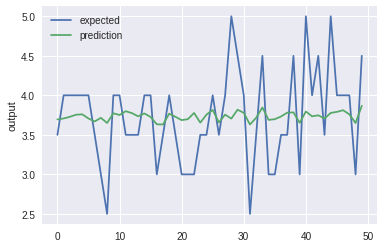

In [0]:
model.add(Dense(1))   #  output layer

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

pred = model.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt

chart_regression(pred2[:50].flatten(),y_test_lin[:50],sort=False)

## **Dropout Layer**

Train on 2195 samples, validate on 388 samples
Epoch 1/1000
 - 13s - loss: 3.8549 - val_loss: 0.8357
Epoch 2/1000
 - 0s - loss: 0.7030 - val_loss: 0.4631
Epoch 3/1000
 - 0s - loss: 0.3742 - val_loss: 0.2711
Epoch 4/1000
 - 0s - loss: 0.2394 - val_loss: 0.2243
Epoch 5/1000
 - 0s - loss: 0.1911 - val_loss: 0.1767
Epoch 6/1000
 - 0s - loss: 0.1623 - val_loss: 0.1586
Epoch 7/1000
 - 0s - loss: 0.1390 - val_loss: 0.1464
Epoch 8/1000
 - 0s - loss: 0.1303 - val_loss: 0.1336
Epoch 9/1000
 - 0s - loss: 0.1192 - val_loss: 0.1315
Epoch 10/1000
 - 0s - loss: 0.1151 - val_loss: 0.1229
Epoch 11/1000
 - 0s - loss: 0.1038 - val_loss: 0.1266
Epoch 12/1000
 - 0s - loss: 0.1043 - val_loss: 0.1365
Epoch 13/1000
 - 0s - loss: 0.0973 - val_loss: 0.1124
Epoch 14/1000
 - 0s - loss: 0.0937 - val_loss: 0.1116
Epoch 15/1000
 - 0s - loss: 0.0873 - val_loss: 0.1084
Epoch 16/1000
 - 0s - loss: 0.0864 - val_loss: 0.1082
Epoch 17/1000
 - 0s - loss: 0.0818 - val_loss: 0.1125
Epoch 18/1000
 - 0s - loss: 0.0780 - val_lo

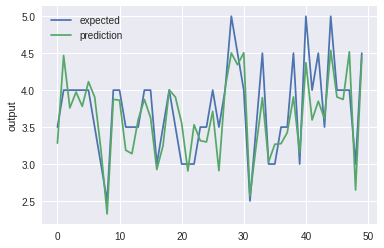

In [0]:
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1]))
model.add(Dropout(0.1))

model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train_lin,y_train_lin,validation_data=(x_test_lin,y_test_lin),callbacks=[monitor],verbose=2,epochs=1000)

pred = model.predict(x_test_lin)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lin))
print("Final score (RMSE): {}".format(score))
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
import matplotlib.pyplot as plt

chart_regression(pred[:50].flatten(),y_test_lin[:50],sort=False)